In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
uncleaned_df = pd.read_csv('Data/Happiness_Index.csv', encoding='ISO-8859-1')
uncleaned_df

In [ ]:
df = pd.read_excel('Data/Happiness_Index_cleaned.xlsx')
df

## Exploratory Data Analysis
- happiness index
- gender
- age
- hours_social_media_daily
- num_of_social_media
- num_of_friends_social_media

In [ ]:
df.info()

In [ ]:
df.describe()

Let's narrow down the dataset.

In [ ]:
sub_df = df[['happiness_index', 'gender', 'age', 'hours_social_media_daily', 'num_of_social_media', 'num_of_friends_social_media']]
sub_df

In [ ]:
sub_df.isnull().sum()

In [ ]:
sub_df[sub_df.isnull().any(axis=1)]     # View all rows with NaN values

### Stopped to think
Here we take a closer look at the mean, max and min of our data. Here are some things we noticed:

1. mean age is around 24.5 years old; our sample size is pretty young in general
2. max hours_social_media_daily is 24hrs (seems very unrealistic, so we assume that it is possible to spend time on multiple social media platforms at once)
3. mean of num_of_friends_social_media is ~13,000; here we should be careful not to over-generalise this data as it could vary greatly based on country, platform, or other factors

In [ ]:
sub_df.describe()

In [ ]:
sub_df = sub_df.dropna()
sub_df.isnull().sum()

In [ ]:
f"We now have {sub_df.shape[0]} rows and {sub_df.shape[1]} columns."

In [ ]:
sub_df.sample(10)

In [ ]:
sns.set_style("darkgrid")

sns.distplot(sub_df['happiness_index'], kde=False, rug=True);

In [ ]:
# kde is the kernel density estimation, which creates a smooth curve given a set of data 
sns.distplot(sub_df['happiness_index'])

In [ ]:
# Someone uses social media for 24 hours daily?! ö
sns.distplot(sub_df['hours_social_media_daily'])

In [ ]:
sns.relplot(x="hours_social_media_daily", y="happiness_index", data=sub_df);

Let's plot a line graph with the confidence interval.
The confidence interval (ci) is a range of values we are fairly sure our true value lies in (as represented by the shaded areas)


### Hours Social Media Daily

In [ ]:
sns.relplot(x="hours_social_media_daily", y="happiness_index", kind='line', data=sub_df);

- there is no confidence interval for hours > 5 because we only have 1 data point for them
- for hours < 5, the confidence intervals are very wide as the happiness index observed could range from 3 to 10

In [ ]:
sns.relplot(x="hours_social_media_daily", y="happiness_index", kind='line', ci=None, data=sub_df);

In [ ]:
x = sub_df['hours_social_media_daily']
y = sub_df['happiness_index']
x.corr(y)   

Looks like everyone spends about the same time on social media

In [ ]:
sns.catplot(x='gender', y='hours_social_media_daily', data=sub_df);

In [ ]:
plt.figure(figsize=(9,8))
ax = sns.swarmplot(x="hours_social_media_daily", y="happiness_index", hue="gender", data=sub_df)

In [ ]:
plt.figure(figsize=(9,8))
ax = sns.catplot(x="hours_social_media_daily", y="happiness_index", hue="gender", data=sub_df)

### Gender

In [ ]:
df.boxplot(by ='gender', column =['happiness_index'], grid = True) 

In [ ]:
sns.set_style("whitegrid") 
sns.boxplot(x='gender', y='happiness_index', data=sub_df)

In [ ]:
males_df = sub_df[sub_df['gender'] == 'Male']
females_df = sub_df[sub_df['gender'] == 'Female']

print(males_df.head(), '\n------------------------')
print(females_df.head())

In [ ]:
plt.figure()
plt.figure(figsize=(10, 10))
males_happiness = males_df['happiness_index']
females_happiness = females_df['happiness_index']
ax1 = sns.distplot(males_happiness)
ax2 = sns.distplot(females_happiness)
plt.axvline(np.mean(males_happiness), color='b', linestyle='dashed', linewidth=5, alpha=0.5)   # Add alpha for transparency
plt.axvline(np.mean(males_happiness), color='orange', linestyle='dashed', linewidth=5, alpha=0.5)

In [ ]:
# If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, 
# then we reject the null hypothesis of equal averages.
stat, p = stats.ttest_ind(males_happiness, females_happiness)
print(f"The stat is {stat} and the p-value is {p}")

### Learning Checkpoint 1

Why is the p-value is so large?

The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups.

We expected the p-value to be small since there is barely any difference between the means of the males and females. What is the significance of the t-statistic (stat variable)?

We noticed that seaborn and pandas plot boxplots differently, so we should be careful when choosing which libraries to use. Read the documentation!

The medians for males and females remained the same at 7. However, the median was calculated to be 4 (pandas plot) and 5 (seaborn plot).

In pandas, the error bar (top whisker) was longer, going up to index 10, but in seaborn, the error bar was only up to index 9 and the point with index 10 was considered an outlier. This means that both platforms likely used slightly different mathematical formulas to calculate the median, interquartile ranges and whisker plots. Same for the males, one outlier point was removed in the seaborn plot.

While Pandas plot had interquartile (Q1-Q3) ranges for all categories, Seaborn plot also removed the interquartile range for 'I prefer not to tell' category.

In [ ]:
sub_df

In [ ]:
sub_df.head()

In [ ]:
sub_df

### Number of Social Media/Friends on Social Media

In [ ]:
sns.scatterplot(data=sub_df, x="num_of_friends_social_media", y="happiness_index")

In [ ]:
plt.figure()
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sub_df, x="num_of_social_media", y="happiness_index")

In [ ]:
data = sub_df
x = sub_df['num_of_social_media']
y = sub_df['happiness_index']

In [ ]:
from scipy.stats import kde

# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 8))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')

# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 

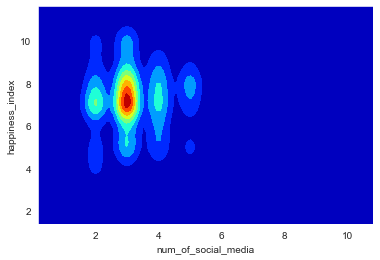

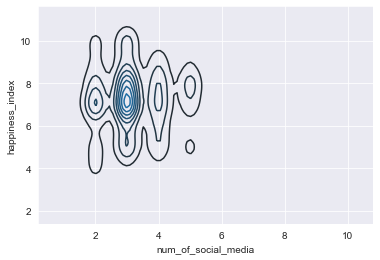

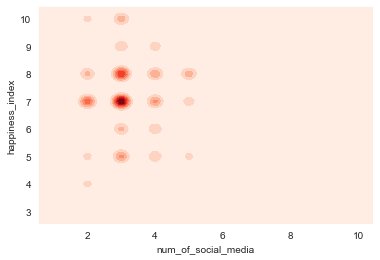

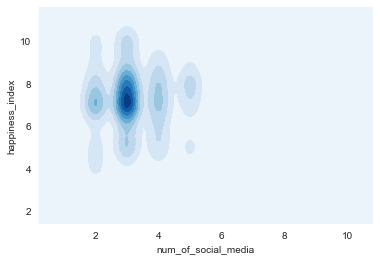

In [95]:
# https://python-graph-gallery.com/1136-2/
import seaborn as sns

sns.kdeplot(x, y, cmap="jet", shade=True)
plt.show()

# Basic 2D density plot - black contour lines only
sns.set_style("darkgrid")
# recall (see above): kde is the kernel density estimation, which creates a smooth curve given a set of data 
sns.kdeplot(x, y)
plt.show()
 
# Custom it with the same argument as 1D density plot - red graph, with dots (density plot)
sns.kdeplot(x, y, cmap="Reds", shade=True, bw=.15)
#bw is the smoothing parameter - i.e. whether we see distinct dots, or a smooth curve
#while cmap represents the colour map, aka adding colours. Reds = diff hues of red, try cmap="mako" for a beautiful color
plt.show()

# Some features are characteristic of 2D: color palette and wether or not color the lowest range - contours, but in blue
sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)
plt.show()
    



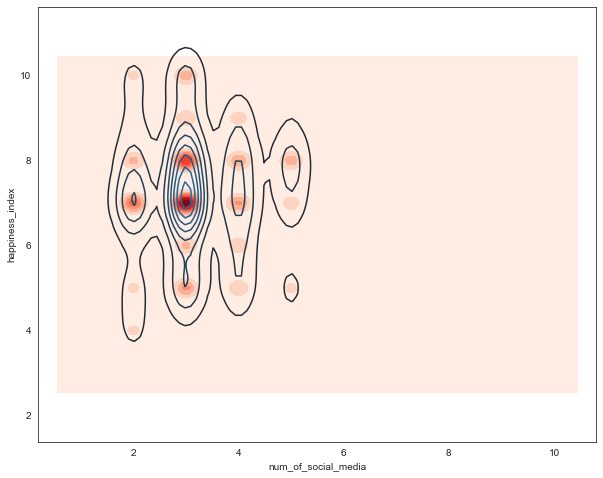

In [82]:
#This is a combination of the 1st and 2nd graph from above
plt.figure(figsize=(10, 8))

df = sns.load_dataset('iris')
 
# Basic 2D density plot (contour only)
sns.set_style("white")
sns.kdeplot(x, y)
 
# Custom it with the same argument as 1D density plot (red histogram)
sns.kdeplot(x, y, cmap="Reds", shade=True, bw=.15)
plt.show()

In [ ]:
# https://python-graph-gallery.com/1136-2/
plt.figure(figsize=(10, 8))

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)
# plt.show()

# Custom it with the same argument as 1D density plot
sns.kdeplot(x, y, cmap="Reds", shade=True, bw=.15)

# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()

### Learning points
1. What do the contours mean?
Contour lines show where the density of points are the same! It's almost like a 3D plot, because the colour hues give another 'dimension' to the graph.
2. What is KDE?
KDE represents Kernal Density Estimation!
3. cmap = colour map argument to colour the map
Red, Blue, Mako, 
4. Why do contours look different on two different computers, though running the same code, data and using the same jupyter notebook?


### TODO:
- https://seaborn.pydata.org/generated/seaborn.pairplot.html